# Projeto - Classificação Machine Learning - Vendas de Carros Usados

### Importando bibliotecas


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Carregando Dataset

In [22]:
raw_data = pd.read_csv('Dataset.csv', sep = ',')
raw_data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


### Modificando títulos das colunas

In [23]:
Lista_Titulos_Traduzidos = {'mileage_per_year':'milhas_por_ano', 'model_year':'ano_do_modelo',
'price':'preco','sold':'vendido'}

raw_data = raw_data.rename(columns = Lista_Titulos_Traduzidos)
raw_data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


### Codificando Resultados - Coluna Vendido
### 1 - Carros Vendidos // 0 - Carros Não Vendidos


In [24]:
codigo_vendido = {'yes':1, 'no':0}

raw_data.vendido = raw_data.vendido.map(codigo_vendido)
raw_data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


### Criação da Coluna - Ano Atual
### Coluna para identificar baseado no ano do modelo e no ano atual, qual a idade do veículo

In [25]:
from datetime import datetime
ano_atual = datetime.today().year

raw_data['Idade_Veículo'] = ano_atual - raw_data['ano_do_modelo']
raw_data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,Idade_Veículo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


### Realizando a transformação da unidade milhas para km

In [26]:
constante_conversao = 1.60934

raw_data['km_por_ano'] = round(raw_data['milhas_por_ano']*constante_conversao)
raw_data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,Idade_Veículo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.0
1,1,7843,1998,40557.96,1,23,12622.0
2,2,7109,2006,89627.50,0,15,11441.0
3,3,26823,2015,95276.14,0,6,43167.0
4,4,7935,2014,117384.68,1,7,12770.0


### Definindo dataset transformado

In [27]:
data = raw_data.drop(['Unnamed: 0','milhas_por_ano','ano_do_modelo'], axis = 1)
data.head()

,preco,vendido,Idade_Veículo,km_por_ano
0,30941.02,1,21,35085.0
1,40557.96,1,23,12622.0
2,89627.50,0,15,11441.0
3,95276.14,0,6,43167.0
4,117384.68,1,7,12770.0


### Analisando Informações e Estatisticas Gerais do Dataset

In [28]:
informacoes_dataset = {}
valores_dataset = data.shape[0]

for col in data.columns:
    nulls = round(data[col].isna().sum()/valores_dataset,2)
    dados_formato = data.dtypes[col]

    numero_valores = data[col].value_counts().sum()
    for index, colnames in data.items():
        informacoes_dataset[col] = {'Formato Dado':dados_formato, 'Quantidade Valores Nulos':nulls,'Total Valores':numero_valores}

info_dataset = pd.DataFrame.from_dict(informacoes_dataset, orient='index')
info_dataset



,Formato Dado,Quantidade Valores Nulos,Total Valores
preco,float64,0.0,10000
vendido,int64,0.0,10000
Idade_Veículo,int64,0.0,10000
km_por_ano,float64,0.0,10000


In [29]:
data.describe()

,preco,vendido,Idade_Veículo,km_por_ano
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,64842.373698,0.580000,16.85580,22825.899900
std,25250.592393,0.493583,4.68758,8060.487369
min,-840.360000,0.000000,4.00000,584.000000
25%,44796.375000,0.000000,14.00000,16857.500000
50%,65225.685000,1.000000,18.00000,21595.000000
75%,85111.237500,1.000000,21.00000,27643.250000
max,118929.720000,1.000000,23.00000,63685.000000


### Observado valores negativos no preço, sendo necessario a retirada dos valores já que os mesmos não fazem sentido para a analise

In [30]:
data.query('preco < 1000')

,preco,vendido,Idade_Veículo,km_por_ano
4200,-270.77,1,23,27359.0
4796,-840.36,1,23,21367.0


In [31]:
data2 = data.drop([data.index[4200],data.index[4796]])
data2.describe()

,preco,vendido,Idade_Veículo,km_por_ano
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,64855.455902,0.579916,16.854571,22825.592418
std,25236.167514,0.493597,4.687243,8061.152914
min,1757.970000,0.000000,4.000000,584.000000
25%,44807.537500,0.000000,14.000000,16856.500000
50%,65227.910000,1.000000,18.000000,21595.000000
75%,85115.852500,1.000000,21.000000,27645.750000
max,118929.720000,1.000000,23.000000,63685.000000


### Verificando distribuição dos preços

Text(0.5, 0, 'Preços')

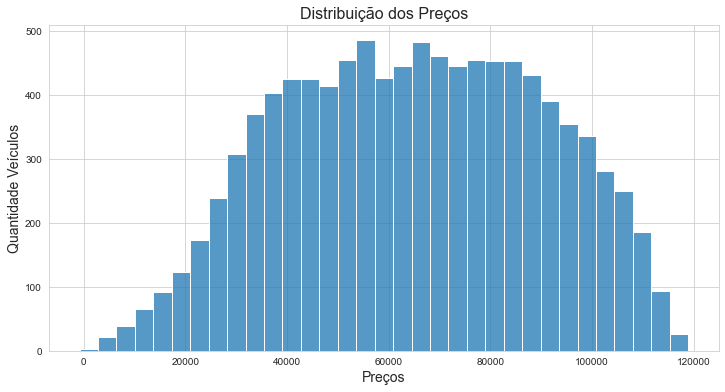

In [32]:
plt.subplots(figsize = (12,6))

sns.set_style('whitegrid')
fig1 = sns.histplot(x = 'preco', data = data)
fig1.set_title('Distribuição dos Preços', fontsize = 16)
fig1.set_ylabel('Quantidade Veículos', fontsize = 14)
fig1.set_xlabel('Preços', fontsize = 14)

### Inicinado Tratamento para o modelo de ML

In [33]:
x = data2[['preco','Idade_Veículo','km_por_ano']]
y = data2['vendido']

### Utilizando o LinearSVC (Avaliando Performance)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter("ignore")

SEED = 5 #Consolidando o fator randomico
np.random.seed(SEED)

train_X,test_X,train_y,test_y = train_test_split(x,y, test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(train_X,train_y)
previsoes = modelo.predict(test_X)

acuracia = accuracy_score(test_y,previsoes)*100
print(f'Acurácia apresentada pelo modelo foi de {acuracia}%')

Acurácia apresentada pelo modelo foi de 57.64%


### Comparando Resultado com Baseline (Estratégias Diferentes)

### Estabelecendo Algoritmo Padrão (Baseline) - Stratify

In [35]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_X,train_y)

acuracia_dummy = round(dummy_stratified.score(train_X,train_y)*100,2)
print(f'Acurácia apresentada pelo modelo foi de {acuracia_dummy}%')

Acurácia apresentada pelo modelo foi de 51.45%


### Estabelecendo Algoritmo Padrão (Baseline) - Most Frequent

In [36]:
from sklearn.dummy import DummyClassifier
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(train_X,train_y)

acuracia_most_frequent = round(dummy_most_frequent.score(train_X,train_y)*100,2)
print(f'Acurácia apresentada pelo modelo foi de {acuracia_most_frequent}%')

Acurácia apresentada pelo modelo foi de 57.99%


### Resultados apresentam o modelo ML com baixa qualidade utilizando o LinearSVC, comparando com os valores de acuracia encontradas com os baselines.

### Utilizando o StandardScaler com o intuito de modificar a escala das variáveis independentes e verificando o impacto na qualidade do modelo.

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

scale_train_x, scale_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(scale_train_x)
train_x = scaler.transform(scale_train_x)
test_x = scaler.transform(scale_test_x)

modelo = SVC()
modelo.fit(train_x,train_y)
previsoes = modelo.predict(test_x)

acuracia_scale = round(accuracy_score(test_y, previsoes)*100,2)
print(f'Acurácia apresentada pelo modelo foi de {acuracia_scale}%')



Acurácia apresentada pelo modelo foi de 76.52%


### Por fim utilizando o modelo DecisionTreeClassifier, conseguimos visualizar o caminho das decisões ocorridas e como as variáveis se comportam.

In [38]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(train_x,train_y)
previsoes = modelo.predict(test_x)

acuracia_decision = round(accuracy_score(test_y,previsoes)*100,2)
print(f'Acurácia apresentada pelo modelo foi de {acuracia_decision}%')


Acurácia apresentada pelo modelo foi de 78.28%


### Representação grafica do caminho de decisões do modelo Decision Tree Classifier

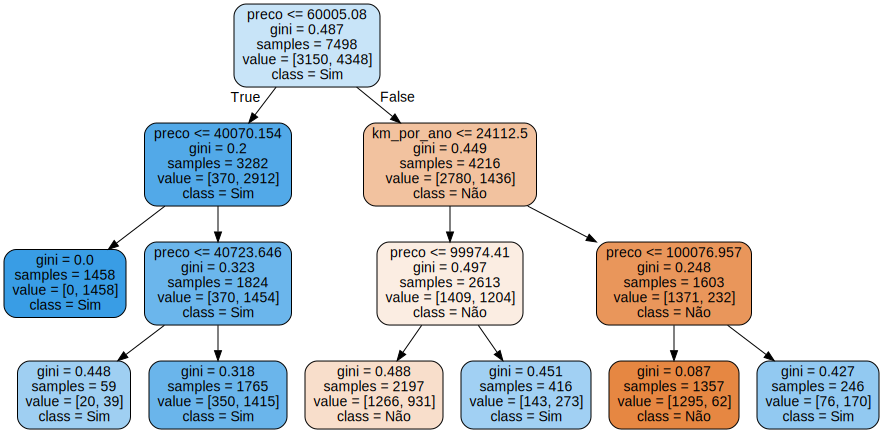

In [39]:
from sklearn.tree import export_graphviz
import graphviz

variaveis = x.columns
dot_data = export_graphviz(modelo, out_file= None, feature_names= variaveis, filled= True,
                           rounded = True, class_names= ['Não','Sim']
                          )

grafico_tree = graphviz.Source(dot_data)
grafico_tree
